In [1]:
import numpy as np #using to change type, concatenate, reshape, make array, find argmax, arrange, save
import pandas as pd #using to read data from csv file
from keras.utils import np_utils #using to covert the label (label) to categorical formats for CNN
from keras.datasets import mnist #import mnist dataset using keras.datasets
from sklearn.utils import shuffle ##using to shuffle dataset (for show plot)
from sklearn.model_selection import train_test_split #using to split data to train and test
from matplotlib import pyplot as plt ##using to plot data

In [2]:
#  Note for each step
## Note for the step that not necessary, can delete if you want

# Saved aussie handwritten database A_z Handwritten Data
# Store the data to variable root
root = "D:\Code\Code\Workspace\Python\A_Z Handwritten Data\A_Z Handwritten Data.csv"

In [3]:
# Because the data is a csv file, using pandas library to read AZ characters dataset in the type of float 32
# Store to variable "dataset"
dataset = pd.read_csv(root).astype("float32")
# Each particular image has separate into 785 columns (from 1 column label at first and 28*28 pixel)
# Rename '0' column of "dataset" as "label"
dataset.rename(columns={'0': "label"}, inplace=True)

In [19]:
# Dropped labels and captured the rest of 784 pixels of each image in "dataset" and passed it to "letter" variable
# Axis = 1, drop with column (row if axis = 0)
letter = dataset.drop("label", axis=1)
# Captured the labels of "dataset" and passed it to "letterLabel" variable
letterLabel = dataset["label"]
# Load mnist data and set to "digitTrain, digitTrainLabel", "digitTest, digitTestLabel" variables
(digitTrain, digitTrainLabel), (digitTest, digitTestLabel) = mnist.load_data()

# Passed data of letter.values to "letter"
letter = letter.values
## Print out the shape of letter and digit "dataset" 
print("\nShape of \"letter\" and \"letterLabel\"")
print(letter.shape, letterLabel.shape)
print("Shape of \"digitTrain\" and \"digitTrainLabel\"")
print(digitTrain.shape, digitTrainLabel.shape)
print("Shape of \"digitTest\" and \"digitTestLabel\"")
print(digitTest.shape, digitTestLabel.shape)


Shape of "letter" and "letterLabel"
(372450, 784) (372450,)
Shape of "digitTrain" and "digitTrainLabel"
(60000, 28, 28) (60000,)
Shape of "digitTest" and "digitTestLabel"
(10000, 28, 28) (10000,)


In [20]:
# Concatenate (definition: link (things) together in a chain of a series)
# => Concatenated both digit train and digit test
# Store in "digitData" and "digitLabel" variable
digitData = np.concatenate((digitTrain, digitTest))
digitLabel = np.concatenate((digitTrainLabel, digitTestLabel))
## Print out the shape new digit data set
print("Shape of \"digitData\" and \"digitLabel\"")
print(digitData.shape, digitLabel.shape)

Shape of "digitData" and "digitLabel"
(70000, 28, 28) (70000,)


In [6]:
# Added 26 labels to "digitLabel" to merge letter and digit data set (26 labels mean 26 characters)
# From 0 to 26 is for the labels of A to Z characters, from 26 to onwards is for labels of all 0 to 9 digit numbers
digitLabel += 26

In [22]:
# Look through each and every feature images of A to Z handwritten data set
# Create a "data" list variable
data = []
# Look through each and every 784 pixels vector of "letter" and assign it to a "flatten" variable in each time
for flatten in letter:
    # reshape "flatten" with 784 pattern pixels to 28 and 28 and 1 shape (three dimensional array)
    # store in "image" variable
    image = np.reshape(flatten, (28, 28, 1))
    # using numpy.36 that reshape image is going to be append to "data" list  
    data.append(image)

# Converted "data" list as a numpy array in the type of float 32
# Store in "letterData" variable
letterData = np.array(data, dtype=np.float32)
# Reshape "digit_data" as a 4 dimensional array using numpy.reshape
digitData = np.reshape(digitData, (digitData.shape[0], digitData.shape[1], digitData.shape[2], 1))

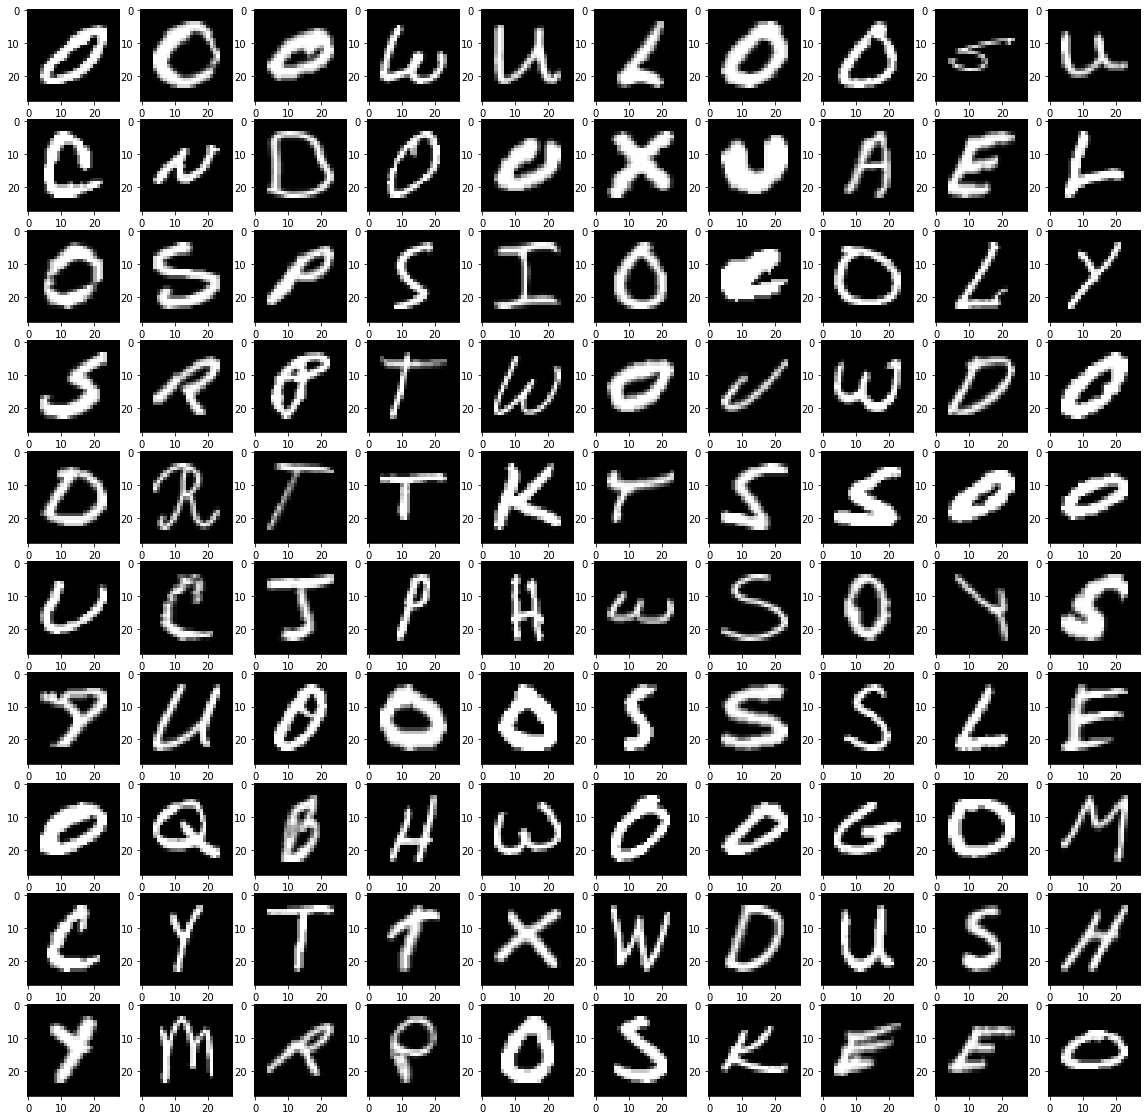

In [8]:
## shuffle and randomly picked 100 images from A to Z hand written character data in "letterData"
## Store in shuffledData variable
shuffledData = shuffle(letterData)
## Set row and columns to show data
rows, cols = 10, 10
## Plot data using matplotlib
plt.figure(figsize=(20, 20))
for i in range(rows * cols):
    plt.subplot(cols, rows, i+1)
    plt.imshow(shuffledData[i].reshape(28, 28), interpolation="nearest", cmap="gray")
plt.show()

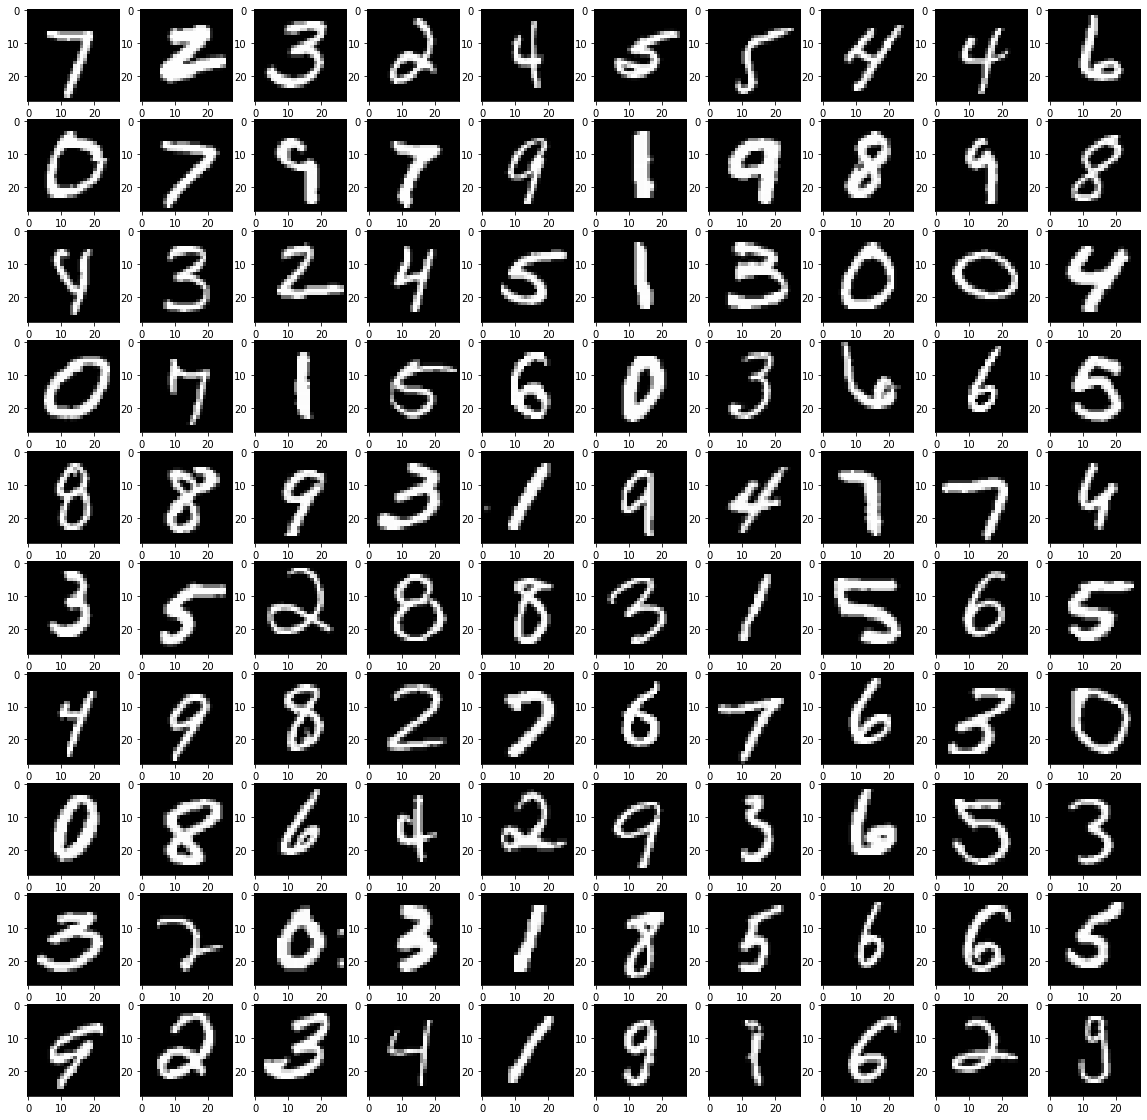

In [9]:
## shuffle and randomly picked 100 images from 0 to 9 hand written character data in "digitData"
## Store in shuffledData variable
shuffledData = shuffle(digitData)
## Set row and columns to show data
rows, cols = 10, 10
## Plot data using matplotlib
plt.figure(figsize=(20, 20))
for i in range(rows * cols):
    plt.subplot(cols, rows, i+1)
    plt.imshow(shuffledData[i].reshape(28, 28), interpolation="nearest", cmap="gray")
plt.show();

In [23]:
# Concatenated "letterData" and "digitData" as "data"
data = np.concatenate((digitData, letterData))
# Concatenated "letterLabel" and "digitLabel" as "label"
label = np.concatenate((digitLabel, letterLabel))
print("Shape of \"Data\" and \"Label\"")
print(data.shape, label.shape)

Shape of "Data" and "Label"
(442450, 28, 28, 1) (442450,)


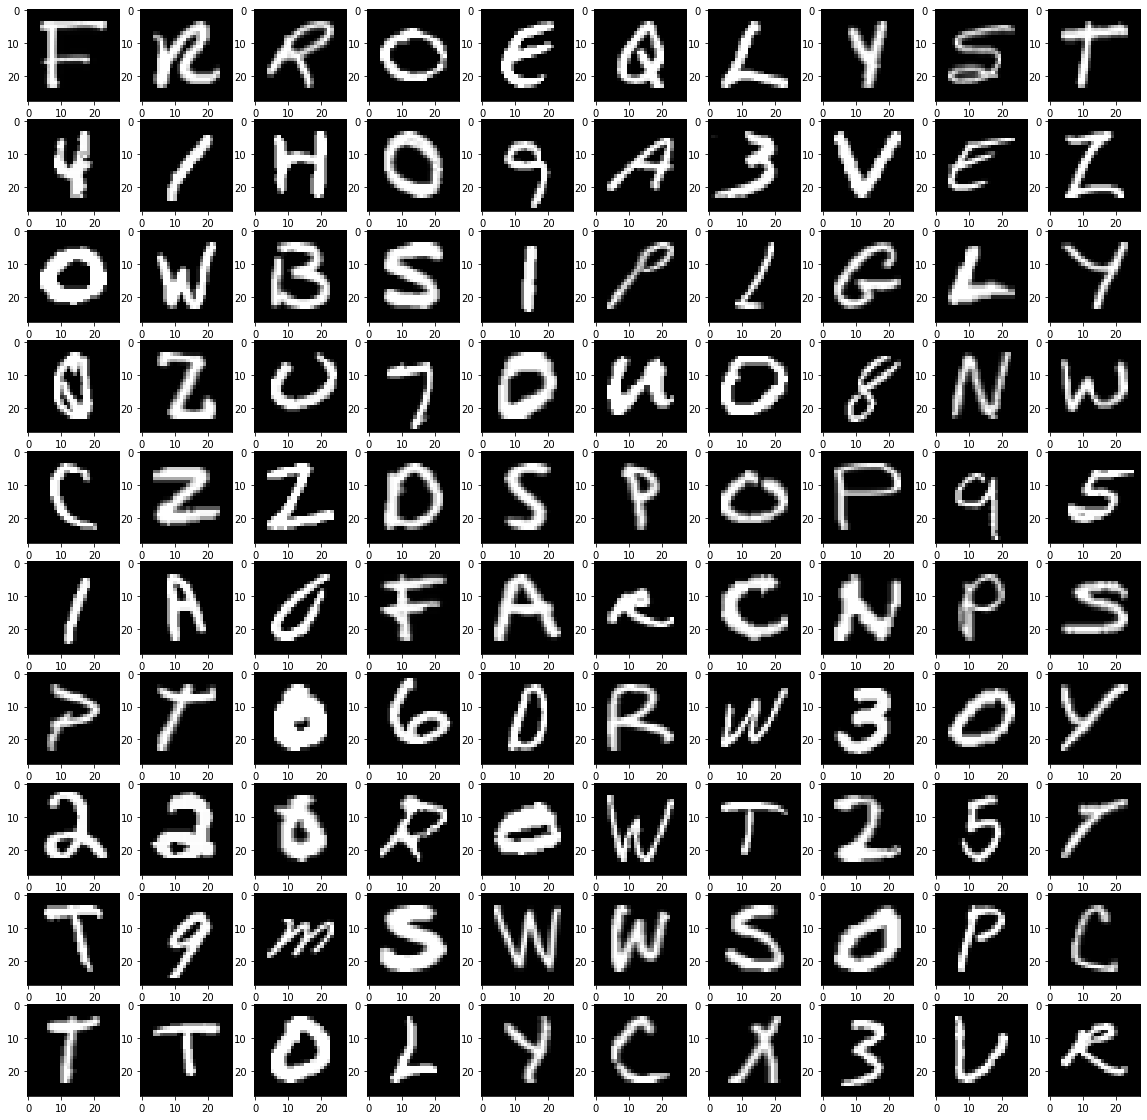

In [11]:
# shuffle and randomly picked 100 images from hand written character data in "data"
## Store in shuffledData variable
shuffledData = shuffle(data)
## Set row and columns to show data
rows, cols = 10, 10
## Plot data using matplotlib
plt.figure(figsize=(20, 20))
for i in range(rows * cols):
    plt.subplot(cols, rows, i+1)
    plt.imshow(shuffledData[i].reshape(28, 28), interpolation="nearest", cmap="gray")
plt.show();

In [25]:
# Split merge data set into trainData, testData and trainLabels, testLabels
trainData, testData, trainLabels, testLabels = train_test_split(data, label, test_size=0.2)
print("\nShape of \"trainData\" and \"trainLabels\"")
print(trainData.shape, trainLabels.shape)
print("Shape of \"testData\" and \"testLabels\"")
print(testData.shape, testLabels.shape)


Shape of "trainData" and "trainLabels"
(353960, 28, 28, 1) (353960,)
Shape of "testData" and "testLabels"
(88490, 28, 28, 1) (88490,)


In [13]:
# Normalized each pixel in "trainData" and "testData" by dividing them by 255 
# Divide by 255 meaning normalized each pixel "trainData" and "testData" in the range of 0 to 1
trainData /= 255
testData /= 255

In [14]:
# Converted "trainLabels" and "testLabels" to the categorical formation
# Since the convolution neural network (CNN) accepts only the labels of categorical formats
trainLabels = np_utils.to_categorical(trainLabels)
testLabels = np_utils.to_categorical(testLabels)

In [15]:
# Covert "trainData" and "testData" into 4 dimensional arrays 
trainData = np.reshape(trainData, (trainData.shape[0], trainData.shape[1], trainData.shape[2], 1))
testData = np.reshape(testData, (testData.shape[0], testData.shape[1], testData.shape[2], 1))


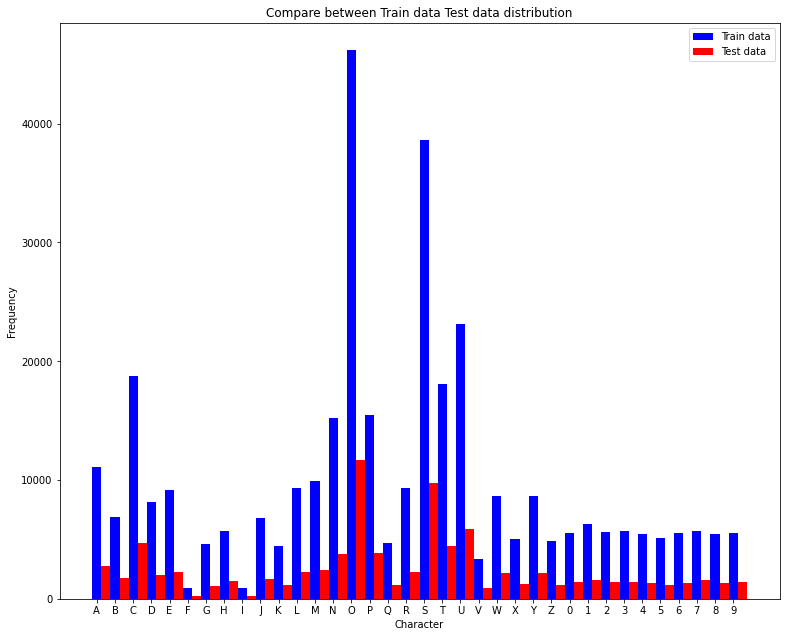

In [16]:
## plot the train and test distribution table
## Create counts variable for train and test label
trainLabelCounts = [0 for i in range(36)]
testLabelCounts = [0 for i in range(36)]
## Count number of data in each label
for i in range(trainData.shape[0]):
    trainLabelCounts[np.argmax(trainLabels[i])] += 1
for i in range(testData.shape[0]):
    testLabelCounts[np.argmax(testLabels[i])] += 1
## plot
frequency = [trainLabelCounts, testLabelCounts] 

fig =  plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
     '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.xticks(range(len(frequency[0])), x)
plt.title("Compare between Train data Test data distribution")
plt.xlabel("Character")
plt.ylabel("Frequency")

ax.bar(np.arange(len(frequency[0])), frequency[0], color="b", width=0.5)
ax.bar(np.arange(len(frequency[1])) + 0.5, frequency[1], color="r", width=0.5)
ax.legend(labels=["Train data", "Test data"])
plt.show()

In [17]:
# Save train, test data and labels
np.save("D:\Code\Code\Workspace\Python\A_Z Handwritten Data\\numpy\\trainData", trainData)
np.save("D:\Code\Code\Workspace\Python\A_Z Handwritten Data\\numpy\\trainLabels", trainLabels)
np.save("D:\Code\Code\Workspace\Python\A_Z Handwritten Data\\numpy\\testData", testData)
np.save("D:\Code\Code\Workspace\Python\A_Z Handwritten Data\\numpy\\testLabels", testLabels)

## Check
print("Store successful")

Store successful
